<a href="https://colab.research.google.com/github/jananisree-a-s/SCT_DS_3/blob/main/Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving bank 2.xlsx to bank 2 (1).xlsx
  age           job  marital  education default balance housing loan  contact  \
0  58    management  married   tertiary      no    2143     yes   no  unknown   
1  44    technician   single  secondary      no      29     yes   no  unknown   
2  33  entrepreneur  married  secondary      no       2     yes  yes  unknown   
3  47   blue-collar  married    unknown      no    1506     yes   no  unknown   
4  33       unknown   single    unknown      no       1      no   no  unknown   

  day month duration campaign pdays previous poutcome   y  
0   5   may      261        1    -1        0  unknown  no  
1   5   may      151        1    -1        0  unknown  no  
2   5   may       76        1    -1        0  unknown  no  
3   5   may       92        1    -1        0  unknown  no  
4   5   may      198        1    -1        0  unknown  no  
Shape: (299, 17)
Columns: Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loa

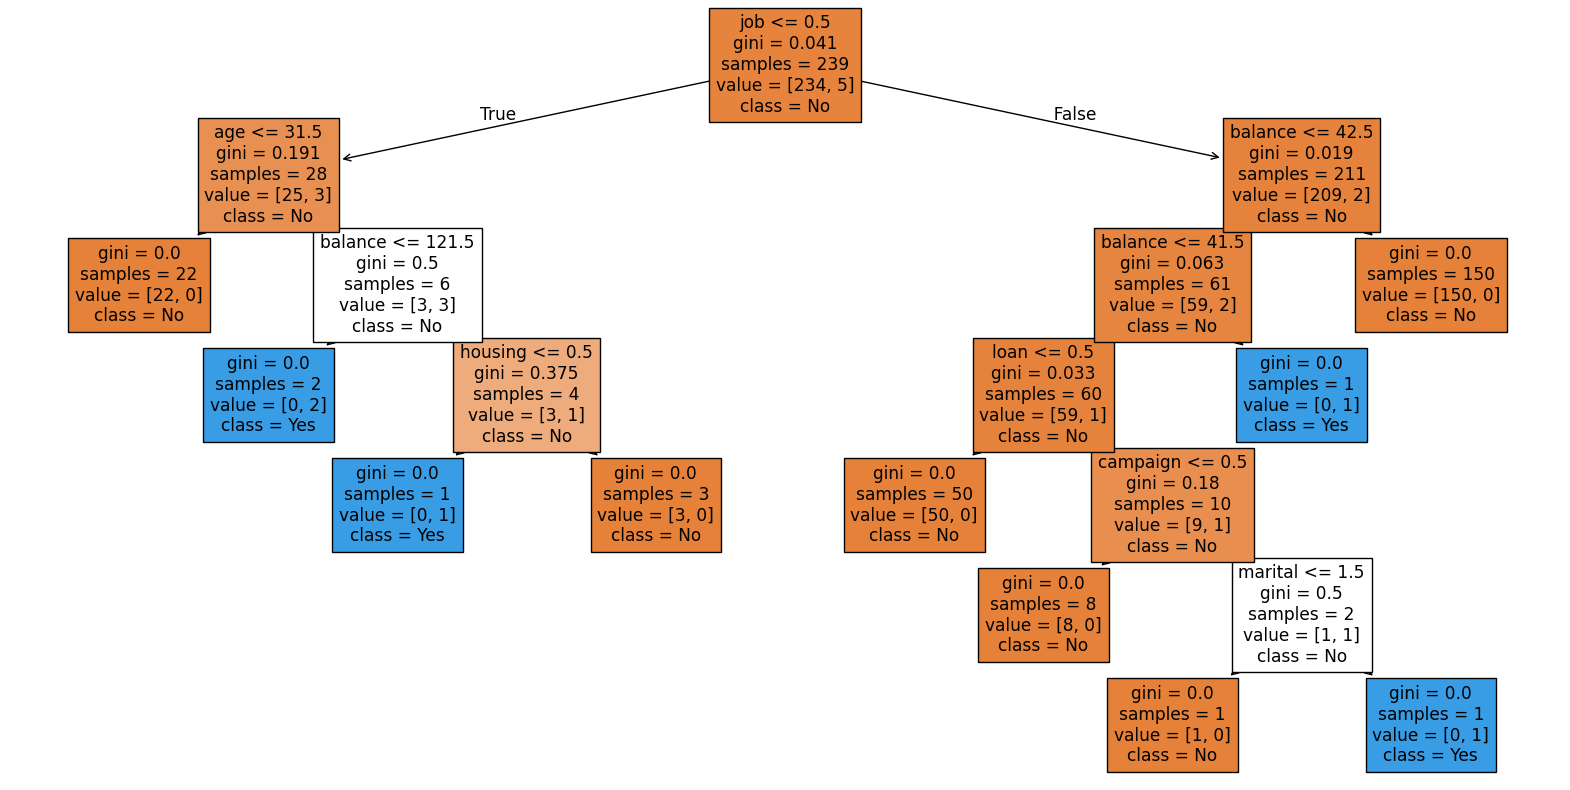

Final Columns: Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')


In [16]:

from google.colab import files
uploaded = files.upload()
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
# Read the raw excel file
raw_df = pd.read_excel("bank 2.xlsx", header=None)
# Split header row
header = raw_df.iloc[0, 0].split(';')
# Split data rows
data = raw_df.iloc[1:, 0].apply(lambda x: str(x).split(';'))
# Create proper DataFrame
df = pd.DataFrame(data.tolist(), columns=header)
# Clean column names and values
df.columns = df.columns.str.replace('"', '').str.strip()
df = df.apply(lambda col: col.astype(str).str.replace('"', '').str.strip())
# Replace empty values with NaN and drop missing
df.replace(['', 'nan', 'NaN'], np.nan, inplace=True)
df = df.dropna()
# Show basic details
print(df.head())
print("Shape:", df.shape)
print("Columns:", df.columns)
print("Missing values:\n", df.isnull().sum())
# Encode categorical columns
le = LabelEncoder()
for col in df.columns:
    df[col] = le.fit_transform(df[col])
# Make sure target column exists
if 'y' not in df.columns:
    raise ValueError("Target column 'y' not found in dataset.")
# Split features and target
X = df.drop('y', axis=1)
y = df['y']
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
# Train Decision Tree model
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)
# Predictions
y_pred = model.predict(X_test)
# Model evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
# Plot the Decision Tree
plt.figure(figsize=(20, 10))
plot_tree(model, feature_names=X.columns, class_names=['No', 'Yes'], filled=True)
plt.show()
# Print columns at the end
print("Final Columns:", df.columns)